# Prediction


## Yash Trivedi
## 2019B4AA0834G

###Loading data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive'
%pwd

/content/drive/MyDrive


'/content/drive/MyDrive'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tourist = pd.read_csv("/content/drive/MyDrive/task3/enriched_tourist_trajectory.csv")

In [5]:
print(tourist.shape)

(33029, 16)


In [6]:
tourist.head()

,VehicleID,trajectory_id,date_time_o,date_time_d,category_o,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,trajectory_type
0,6LurW0yL8xDb6eslP9L3U/VH62U,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,Accommodation,Hotel,NightClub/Bar,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,High spending tourist,NightlifeTrip
1,OU+NtvniamKjJS7GdVebDYzVDqc,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,Accommodation,Hotel,Spa,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,High spending tourist,SpaTrip
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,Accommodation,Hotel,Spa,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,High spending tourist,SpaTrip
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,Accommodation,Hotel,Restaurant,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,High spending tourist,FoodAndDrinkTrip
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,Accommodation,Hotel,NightClub/Bar,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,High spending tourist,NightlifeTrip


###Data cleaning and pre-processing

In [7]:
tourist['tourist_type'] = tourist['tourist_type'].map({'High spending tourist': 1, 'Economical spending tourist': 0}) 

In [8]:
tourist = tourist.replace(["inn"],"Inn")
tourist = tourist.replace(["Residential Building (Apartment / Condo)"],"Residential Building")

In [9]:
tourist['subcategory_o'] = tourist['subcategory_o'].map({'Hotel':0, 'Hostel':1, 'Residential Building':1, 'Resort':0, 'Bed & Breakfast':0, 'Inn':0, 'Apartment':1, 'Homestay':0, 'Condo':1, 'Hotel Pool':0, 'Mansion':1})

In [10]:
tourist['category_o'] = tourist['category_o'].map({'Accommodation': 1}) 


In [11]:
tourist.head()

,VehicleID,trajectory_id,date_time_o,date_time_d,category_o,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,trajectory_type
0,6LurW0yL8xDb6eslP9L3U/VH62U,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,1,0,NightClub/Bar,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,1,NightlifeTrip
1,OU+NtvniamKjJS7GdVebDYzVDqc,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,1,0,Spa,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,1,SpaTrip
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,1,0,Spa,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,1,SpaTrip
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,1,0,Restaurant,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,1,FoodAndDrinkTrip
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,1,0,NightClub/Bar,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,1,NightlifeTrip


In [12]:
subcat_o = tourist["subcategory_o"].value_counts()
subcat_o

0    26917
1     6112
Name: subcategory_o, dtype: int64

In [13]:
cat_o = tourist["category_o"].value_counts()
cat_o

1    33029
Name: category_o, dtype: int64

###RELATION BETWEEN CATEGORY_D AND TRAJECTORY_TYPE

In [14]:
tourist['category_d'] = tourist['category_d'].map({'Restaurant':0, 'NightClub/Bar':1, 'Spa':2, 'Shopping Mall':3, 'Leisure':5, 'Religious':4})

In [15]:
tourist['trajectory_type'] = tourist['trajectory_type'].map({'FoodAndDrinkTrip':0, 'NightlifeTrip':1, 'SpaTrip':2, 'ShoppingTrip':3, 'LeisureTrip':5, 'ReligiousTrip':4})


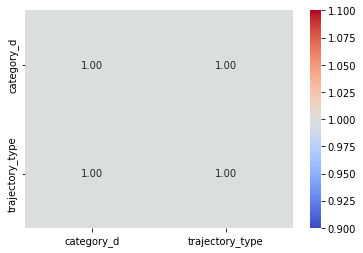

In [16]:
g = sns.heatmap(tourist[['category_d', 'trajectory_type']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()


100% correlation between category_d and trajectory type

In [17]:
tourist = tourist.drop(['trajectory_type'],axis = 1)
tourist.head()

,VehicleID,trajectory_id,date_time_o,date_time_d,category_o,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type
0,6LurW0yL8xDb6eslP9L3U/VH62U,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,1,0,1,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,1
1,OU+NtvniamKjJS7GdVebDYzVDqc,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,1,0,2,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,1
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,1,0,2,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,1
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,1,0,0,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,1
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,1,0,1,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,1


In [18]:
cat_d = tourist["category_d"].value_counts()
cat_d

0    9982
1    9808
2    9432
3    2740
4     852
5     215
Name: category_d, dtype: int64

In [19]:
tourist = tourist.drop(['category_o'],axis = 1)
tourist.head()

,VehicleID,trajectory_id,date_time_o,date_time_d,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type
0,6LurW0yL8xDb6eslP9L3U/VH62U,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,0,1,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,1
1,OU+NtvniamKjJS7GdVebDYzVDqc,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,0,2,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,1
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,0,2,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,1
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,0,0,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,1
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,0,1,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,1


### Subcategory_o and tourist type similarity

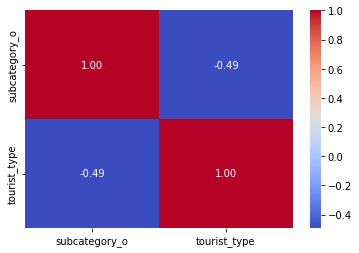

In [20]:
g = sns.heatmap(tourist[['subcategory_o', 'tourist_type']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()


We can conclude that there is some relation between tourist type and onboarding type

###Ranking vehicleid

In [21]:
vehicleid = tourist[["VehicleID"]]
vehicleid.reset_index(drop = True).head()

,VehicleID
0,6LurW0yL8xDb6eslP9L3U/VH62U
1,OU+NtvniamKjJS7GdVebDYzVDqc
2,XCBitNTVEv/xoXEjSQJ6utsCtr4
3,pFPFjKr/IEz8P4UqUooLCaaxDRM
4,u2kp5kkoicvAyX1FC5S+L/+0/dY


In [22]:
ranked = pd.Categorical(vehicleid.stack()).codes.reshape(vehicleid.shape)

In [23]:
vehicleid = vehicleid.join(pd.DataFrame(ranked, columns=["masked_vehicle"]))

In [24]:
vehicleid.rename(columns = {'VehicleID':'dummy_name'}, inplace = True)
vehicleid = pd.DataFrame(vehicleid)
vehicleid

,dummy_name,masked_vehicle
0,6LurW0yL8xDb6eslP9L3U/VH62U,402
1,OU+NtvniamKjJS7GdVebDYzVDqc,1314
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,1788
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,2712
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,2972
...,...,...
33024,pIK42Fr5jzBmFyjny+Qp5M0amaQ,2714
33025,UL3za2TYuY4nfS/gRX8sSbhw/Xs,1640
33026,/uLPd/8sedu4wRkR7+MdKxMcME4,105
33027,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ,1285


In [25]:
tourist = pd.concat([tourist, vehicleid], axis = 1)
tourist

,VehicleID,trajectory_id,date_time_o,date_time_d,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,dummy_name,masked_vehicle
0,6LurW0yL8xDb6eslP9L3U/VH62U,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,0,1,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,1,6LurW0yL8xDb6eslP9L3U/VH62U,402
1,OU+NtvniamKjJS7GdVebDYzVDqc,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,0,2,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,1,OU+NtvniamKjJS7GdVebDYzVDqc,1314
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,0,2,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,1,XCBitNTVEv/xoXEjSQJ6utsCtr4,1788
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,0,0,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,1,pFPFjKr/IEz8P4UqUooLCaaxDRM,2712
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,0,1,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,1,u2kp5kkoicvAyX1FC5S+L/+0/dY,2972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33024,pIK42Fr5jzBmFyjny+Qp5M0amaQ,pIK42Fr5jzBmFyjny+Qp5M0amaQ_trip_20190417174454,2019-04-17 17:44:54,2019-04-17 17:56:55,1,2,Spa,13.72068,100.75131,13.72225,100.72910,3070,12.02,1,pIK42Fr5jzBmFyjny+Qp5M0amaQ,2714
33025,UL3za2TYuY4nfS/gRX8sSbhw/Xs,UL3za2TYuY4nfS/gRX8sSbhw/Xs_trip_20190417185526,2019-04-17 18:55:26,2019-04-17 19:07:02,1,0,Korean Restaurant,13.84509,100.58338,13.83998,100.57480,1542,11.60,1,UL3za2TYuY4nfS/gRX8sSbhw/Xs,1640
33026,/uLPd/8sedu4wRkR7+MdKxMcME4,/uLPd/8sedu4wRkR7+MdKxMcME4_trip_20190417163626,2019-04-17 16:36:26,2019-04-17 16:55:10,0,2,Spa,13.52704,100.42049,13.64756,100.43121,13879,18.73,1,/uLPd/8sedu4wRkR7+MdKxMcME4,105
33027,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ_trip_20190417181215,2019-04-17 18:12:15,2019-04-17 19:06:16,0,0,Restaurant,13.77877,100.81404,13.85921,100.81598,24127,54.02,1,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ,1285


In [26]:
tourist = tourist.drop(["dummy_name", "VehicleID"],axis=1)
tourist

,trajectory_id,date_time_o,date_time_d,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,masked_vehicle
0,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,0,1,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,1,402
1,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,0,2,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,1,1314
2,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,0,2,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,1,1788
3,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,0,0,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,1,2712
4,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,0,1,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,1,2972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33024,pIK42Fr5jzBmFyjny+Qp5M0amaQ_trip_20190417174454,2019-04-17 17:44:54,2019-04-17 17:56:55,1,2,Spa,13.72068,100.75131,13.72225,100.72910,3070,12.02,1,2714
33025,UL3za2TYuY4nfS/gRX8sSbhw/Xs_trip_20190417185526,2019-04-17 18:55:26,2019-04-17 19:07:02,1,0,Korean Restaurant,13.84509,100.58338,13.83998,100.57480,1542,11.60,1,1640
33026,/uLPd/8sedu4wRkR7+MdKxMcME4_trip_20190417163626,2019-04-17 16:36:26,2019-04-17 16:55:10,0,2,Spa,13.52704,100.42049,13.64756,100.43121,13879,18.73,1,105
33027,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ_trip_20190417181215,2019-04-17 18:12:15,2019-04-17 19:06:16,0,0,Restaurant,13.77877,100.81404,13.85921,100.81598,24127,54.02,1,1285


##Prediction

In [27]:
Selected_features = ['masked_vehicle','subcategory_o','category_d','distance','time_used','lat_o','lon_o','lat_d','lon_d']

X = tourist[Selected_features]
y = tourist['tourist_type']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [30]:
from sklearn.metrics import confusion_matrix


##Logistic Regeression

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred1,y_test)*100,2)
print(acc_logreg)

87.48


##Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred2 = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred2, y_test) * 100, 2)
# print(acc_randomforest)

In [33]:
from sklearn.metrics import precision_score, recall_score
recall = round(recall_score(y_test, y_pred2)*100,2)

In [34]:
precision = round(precision_score(y_test, y_pred2)*100,2)

print("accuracy = ", acc_randomforest)
print("recall = ",recall)
print("precision = ",precision)

accuracy =  96.5
recall =  99.11
precision =  96.94


##GradientBoosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
xgboost = GradientBoostingClassifier()
xgboost.fit(X_train, y_train)
y_pred3 = xgboost.predict(X_test)
acc_xgboost = round(accuracy_score(y_pred3, y_test) * 100, 2)
print(acc_xgboost)

93.9


##CV

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

model1 = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.966 (0.003)
